### CRISP-DM - Business Understanding
In the world of Information Technology world many think that one of the best paying and satisfactory job is to become a developer. However, there are many different views on the ways to become a developer. In addition, new aspirants in this area wonder if bootcamps will help in getting a placement. Also let's analyze how job satisfaction and salary varies based on the size of the company.


In [1]:
"""
Created on Sun Jul 19 23:43:36 2020

@author: Pankaj Baishya
Credit: Reused code from the Udacity course
"""


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

%matplotlib inline



### CRISP-DM  - Data Understanding

To answer the questions we have let's try to use Stackoverflow’s 2017 Annual Developer Survey data and understand the data. 

In [2]:
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

In [3]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Number of rows and columns in this dataset.
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
print("Num of rows:", num_rows, ", Num of cols:", num_cols)

Num of rows: 51392 , Num of cols: 154


In [5]:
#Set of column names that have no missing values.
no_nulls = set(df.columns[df.isna().sum(axis = 0)==0]) #Provide a set of columns with 0 missing values.
print("Columns with no missing values:", no_nulls)

Columns with no missing values: {'EmploymentStatus', 'Respondent', 'FormalEducation', 'Professional', 'University', 'Country', 'ProgramHobby'}


In [6]:
#Set of column names that have more than 75% if their values missing.
most_missing_cols = set(df.columns[df.isna().mean()>0.75]) #Provide a set of columns with more than 75% of the values missing
print("Columns with the most missing values:", most_missing_cols)

Columns with the most missing values: {'ExpectedSalary', 'ExCoderNotForMe', 'WebDeveloperType', 'MobileDeveloperType', 'YearsCodedJobPast', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderActive', 'TimeAfterBootcamp', 'ExCoderSkills', 'ExCoderWillNotCode', 'NonDeveloperType', 'ExCoderReturn', 'ExCoderBelonged'}


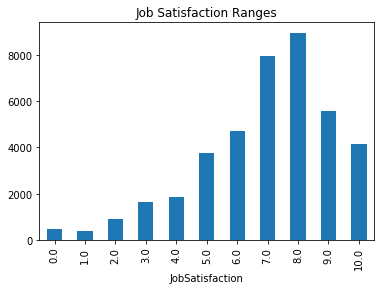

In [7]:
#Check different JobSatisfaction values in the dataset 
#along with the count of the number of individuals with each value. 
status_vals = df.groupby(['JobSatisfaction'])['JobSatisfaction'].count() 
(status_vals).plot(kind="bar");
plt.title("Job Satisfaction Ranges");

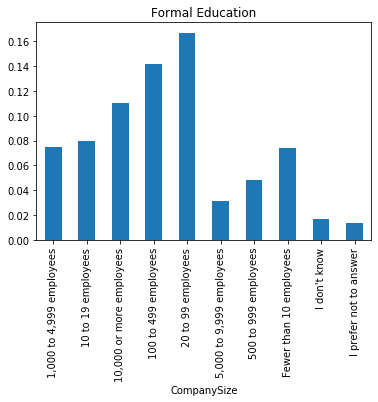

In [8]:
#Check different Salary values in the dataset and proportion of individul in each ranges
ed_vals = df.groupby(['CompanySize'])['CompanySize'].count() 

(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

# of Countries: 201


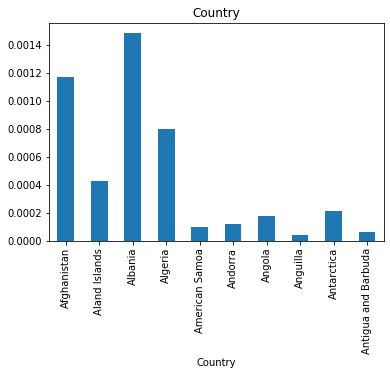

In [9]:
#different Country values in the dataset along with the count of how many individuals are from each country. 
count_vals = df.groupby(['Country'])['Country'].count() #Provide a pandas series of the counts for each Country
print("# of Countries:", count_vals.shape[0])
(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Country");

#### Based on the above data understanding, Survey data covers 51392 reviews from 201 countries and territories. The survey aims to understand multiple aspects of jobs related to software development and data analytics. There were more than 150 questions as a part of the survey, including:
“Do you program as a hobby or contribute to open source projects?”
“Which of the following best describes the highest level of formal education that you’ve completed?”
“How often do you work from home or remotely?”
#### Job satisfaction for most of the participants are ranges from 5 to 10. Maximum number of survey participants are from company size of 20 to 99 employees.

### CRISP-DM  - Prepare Data and Data Modeling - Defining useful functions

In [10]:
#n order to understand how to break into the field, we will look at the CousinEducation field. 
#Use the schema dataset to answer this question. 
#Write a function called get_description that takes the schema dataframe and the column as a string, 
#and returns a string of the description for that column.
#Reused from the Udacity course
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = str(schema[schema['Column']==column_name]['Question'].values[0])
    return desc

In [11]:
#test your code
#Check your function against solution - you shouldn't need to change any of the below code
get_description(df.columns[0]) # This should return a string of the first column description


'Respondent ID number'

In [12]:
#The question we have been focused on has been around Ways to become a developer
#Use your get_description function below to take a closer look at the CousinEducation column.
get_description('CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

In [13]:
#Reused from the Udacity course
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row, add the devs
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    #clean up the resulting dataframe8
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [14]:
#Extact the possible values for CousinEducation
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

In [15]:
#Function to clean the CousinEducation values in the dataframe
#Reused from the Udacity course
def clean_and_plot(df, title='Different ways to become a developer', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df


### CRISP-DM  - Prepare Data and Data Modeling - Different ways to become a developer

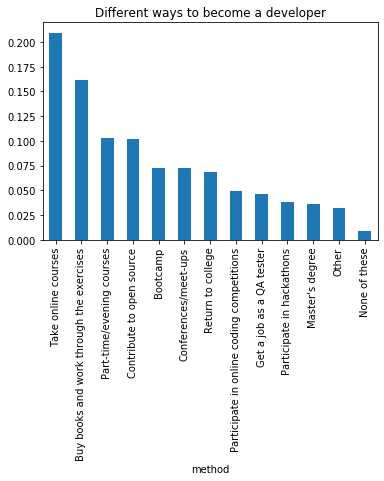

In [16]:
#***********************Ways to become a developer***********
props_df = clean_and_plot(df)

### CRISP-DM  - Evaluate the Results - Different ways to become a developer
Above bar chart shows that more than 20% of survey participants is suggesting taking online courses to become a developer. Similarly, a little above 15% are suggesting buying books and work through exercise. Part-time/ evening courses and contributing to open source is another way to become developer and suggested by around 10% of survey participants.

### CRISP-DM  - Prepare Data and Data Modeling - Job Placement time after bootcamps


In [17]:
#Check if there is any missing value
num_TimeAfterBootcamp = df['TimeAfterBootcamp'].shape[0]
Missing_TimeAfterBootcamp = df['TimeAfterBootcamp'].isna().sum()

print("Total Rows:", num_TimeAfterBootcamp, "Missing TimeAfterBootcamp:", Missing_TimeAfterBootcamp)

Total Rows: 51392 Missing TimeAfterBootcamp: 48790


#### Since there are many missing values, let's analyze the rows with non missing values only.

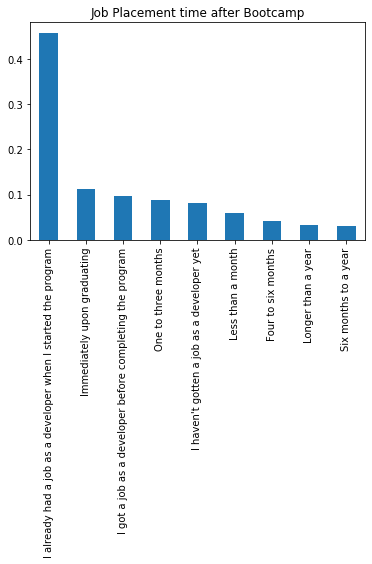

In [18]:
#************************Job Placement time for bootcamps*******************
bootcamps_df = df[df['TimeAfterBootcamp'].isna()==False]
#bootcamps_df.shape

bootcamps_df_time = bootcamps_df['TimeAfterBootcamp'].value_counts() / bootcamps_df.shape[0]

bootcamps_df_time.plot(kind='bar', legend=None);
plt.title("Job Placement time after Bootcamp");
plt.show()


### CRISP-DM  - Evaluate the Results - Job Placement time after bootcamps
Based on the above chart, around 70% of them got into a job within 3 months of completion of the boot camp. There are around 10% of participants which didn't get a job till the survey date but cannot really conclude how long they are without a job.

### CRISP-DM  - Prepare Data and Data Modeling -  Salary and Job Satisfaction comparison based on Company Size.

In [19]:
#Check if there is any missing value
num_JobSatisfaction = df['JobSatisfaction'].shape[0]
Missing_JobSatisfaction = df['JobSatisfaction'].isna().sum()
Missing_Salary = df['Salary'].isna().sum()

print("Total Rows:", num_JobSatisfaction, "Missing JobSatisfaction:", Missing_JobSatisfaction, 
      "Missing Salary:", Missing_Salary)

Total Rows: 51392 Missing JobSatisfaction: 11016 Missing Salary: 38501


#### Since there are many missing values, let's analyze the rows with non missing values only.

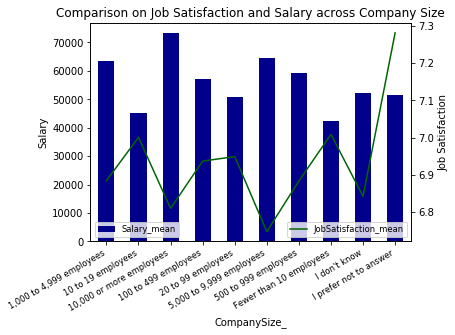

In [20]:
#***********************Salary and job Satisfaction based on Company Size.**************
JobSatisfaction_df = df[df['JobSatisfaction'].isna()==False]
#JobSatisfaction_df.shape
JobSatisfaction_df_grp_CompanySize = JobSatisfaction_df.groupby('CompanySize')['JobSatisfaction'].mean()

Salary_df = df[df['Salary'].isna()==False]
#Salary_df.shape
Salary_df_grp_CompanySize = Salary_df.groupby('CompanySize')['Salary'].mean()


df_grp_CompanySize = df.groupby('CompanySize').agg(
    {
        'JobSatisfaction':['mean'],
        'Salary':['mean']    # Sum duration per group        
    }
).reset_index()
df_grp_CompanySize.columns = df_grp_CompanySize.columns.map('_'.join)

#df_grp_CompanySize

ax=df_grp_CompanySize.plot(kind='bar', color = 'DarkBlue', x='CompanySize_', y='Salary_mean', legend=False);
ax2 = df_grp_CompanySize.plot(ax=ax,kind='line', color = 'DarkGreen', x='CompanySize_', y='JobSatisfaction_mean', 
                              secondary_y=True, legend=False);
ax.set_ylabel('Salary')
ax2.set_ylabel('Job Satisfaction')
plt.title("Comparison on Job Satisfaction and Salary across Company Size");
plt.tight_layout()
plt.xticks(rotation='vertical')
ax.legend(loc="lower left", fontsize='small')
ax2.legend(loc="lower right", fontsize='small')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='small')
plt.show()

### CRISP-DM  - Evaluate the Results - Salary and Job Satisfaction comparison based on Company Size.
Here, we can see that salary and job satisfaction varies across company size and it can be an individual choice which one is priority. A company size of 10,000+ pays maximum but job satisfaction is low. In general, it shows that a bigger company size, we might get a higher salary, but job satisfaction is more in small size companies. To conclude, above graph can be used to choose a right company size for a balance between salary and job satisfaction based on individual priority.
